In [39]:
#import

import warnings # supresses future warnings
warnings.simplefilter(action='ignore')
import pandas as pd # Import the pandas library for df creation
import numpy as np # Import the NumPy library to use the random package
import matplotlib.pyplot as plt # Import the matplotlib library for plotting
import seaborn as sns # Import the seaborn library for plotting
from sklearn.preprocessing import StandardScaler # Data Normalization
from sklearn.metrics import accuracy_score # Accuracy Calculation
from sklearn import preprocessing # Data Normalization
from sklearn.model_selection import train_test_split # For Splitting
from sklearn.metrics import confusion_matrix # For Plotting Confusion Matrix
from sklearn import metrics # For Metrics Calculations
from sklearn import svm # Support Vector Machhine Classifier
from sklearn.metrics import precision_score # Calculating Precision Score
from sklearn.metrics import recall_score # Calculating Recall Score
from sklearn.preprocessing import StandardScaler # For z scale Normalization
from sklearn.decomposition import PCA # Fro PCA
from sklearn.cluster import KMeans # For K means
from sklearn.metrics import confusion_matrix # For printing the confusion matrix
from sklearn.cluster import AgglomerativeClustering # AgglomerativeClustering
from sklearn.cluster import SpectralClustering # SpectralClustering

##Task 1: Data Loading and Scaling

In [40]:
##1. LOADING

# Importing the Downloaded Dataset
X = pd.read_csv('HAR_data.txt', delim_whitespace=True, header=None)
y = pd.read_csv('HAR_labels.txt', names=['Activity'], squeeze=True)
y_labels = y.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
df = X
df['Activity'] = y
df['ActivityName'] = y_labels
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,Activity,ActivityName
3491,0.282414,-0.009778,-0.095087,-0.999897,-0.995128,-0.988621,-1.000000,-0.995392,-0.988905,-0.944535,...,-0.746940,-0.006843,-0.105483,0.184698,-0.204659,-0.851620,0.167595,0.096903,4,SITTING
2241,0.274917,-0.018848,-0.114504,-0.991881,-0.972768,-0.976794,-0.992099,-0.971679,-0.974723,-0.939173,...,-0.662739,-0.092756,0.270058,0.060948,-0.367903,-0.598856,0.236662,0.264863,5,STANDING
3711,0.272636,-0.017645,-0.105614,-0.994238,-0.994713,-0.991408,-0.995014,-0.994405,-0.992361,-0.936099,...,-0.833457,-0.227547,0.007797,0.956586,0.080389,0.622653,-0.436851,-0.572158,6,LAYING
78,0.282022,-0.037696,-0.134897,-0.328280,-0.137153,-0.189086,-0.404875,-0.176791,-0.199474,-0.154731,...,-0.673951,-0.160883,0.564736,0.912473,-0.412836,-0.773707,0.252432,0.044099,1,WALKING
24,0.281715,-0.011911,-0.102875,-0.998534,-0.988489,-0.993184,-0.998674,-0.988544,-0.993287,-0.942559,...,-0.941664,-0.021446,0.337010,-0.436685,-0.622922,-0.758977,0.264224,0.030743,5,STANDING
4903,0.305198,-0.011892,-0.073268,-0.993496,-0.966454,-0.975342,-0.994209,-0.968407,-0.978993,-0.924760,...,-0.946160,-0.007411,0.294756,-0.746314,0.639562,-0.567057,0.206035,0.306495,5,STANDING
2187,0.302391,-0.071154,-0.129459,-0.099760,0.082290,-0.345880,-0.126221,0.056793,-0.300222,0.382871,...,-0.533004,-0.195636,-0.049440,0.966561,-0.630905,-0.807730,0.215111,-0.047617,3,WALKING_DOWNSTAIRS
622,0.267734,-0.039672,-0.123917,-0.398102,-0.067394,-0.390995,-0.450036,-0.072338,-0.371033,-0.111432,...,0.365402,-0.069481,0.336357,0.486352,-0.348553,-0.719869,0.257486,0.130601,1,WALKING
6143,0.278389,-0.017169,-0.109560,-0.986881,-0.987772,-0.995511,-0.988421,-0.988063,-0.995706,-0.925618,...,-0.919518,0.618613,0.514484,-0.218233,-0.450583,0.633298,-0.299240,-0.714546,6,LAYING
1985,0.247470,-0.047274,-0.145256,-0.416532,-0.052237,-0.521678,-0.442892,-0.055177,-0.516036,-0.362674,...,-0.778921,0.164711,0.212857,-0.756518,-0.158159,-0.738673,0.230249,-0.109309,1,WALKING


In [41]:
##2 SCALING

X = df.drop(['ActivityName','Activity'], axis=1)
y = df['Activity']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled, columns=X.columns)

df_scaled

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.795359,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,0.130614,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,1.152336,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,1.112769,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.149577,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.358361,-0.967904,-1.273005,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,...,-0.778758,-0.876738,-0.829197,-0.591277,1.846034,0.325923,-0.878008,-0.590763,0.605162,0.380984
7348,-0.009044,0.243731,-0.676787,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,...,0.159241,-0.260847,-0.180290,0.166951,1.948561,-1.459501,0.849894,-0.551598,0.652468,0.381820
7349,-0.015668,0.016781,1.132221,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,...,0.277877,1.034784,1.044548,0.131018,-0.599877,1.406760,1.479571,-0.565848,0.640597,0.348709
7350,0.215866,-0.028123,-0.867710,0.860922,0.794902,2.086778,0.754697,0.944019,2.235301,1.047375,...,-0.443978,1.155541,0.913569,-0.326769,1.558312,1.525574,-1.220854,-0.577668,0.631478,0.293276


##Task 2: PCA

In [42]:
##3 Run PCA using scaled data, leaving as many components as necessary to explain at least 95% of the variance of the original(scaled) data.

pca = PCA(0.95)
df_pca = pca.fit_transform(df_scaled)
df_pca

array([[-16.13854371,   2.15202401,   3.14478025, ...,  -1.68153546,
         -1.20932492,  -1.17572672],
       [-15.2961943 ,   1.38714378,  -0.68222107, ...,  -1.34739246,
          0.14947399,  -0.73061489],
       [-15.13701861,   2.47335094,  -1.75664057, ...,   0.13803147,
          0.66226306,  -0.22741812],
       ...,
       [ 14.33343587, -12.26071193,   4.0259462 , ...,  -1.32974137,
         -0.08800409,  -0.09253083],
       [ 12.87601895, -14.07125595,   2.91606098, ...,  -0.79743323,
         -0.71168419,   0.56868751],
       [ 13.01610365, -12.24426121,   1.33604965, ...,  -0.043166  ,
         -0.34681818,  -0.67183662]])

In [43]:
##4 Print the minimum number of PCs required to cover the 95% of the variance of the original (scaled) data.

explained_variance_ratio = pca.explained_variance_ratio_
sum_explained_variance_ratio = 0
num_components = 0
for variance in explained_variance_ratio:
    sum_explained_variance_ratio += variance
    num_components += 1
    if sum_explained_variance_ratio >= 0.95:
        break
print("The minimum number of PCs required to cover 95% of the variance is", num_components)    

The minimum number of PCs required to cover 95% of the variance is 102


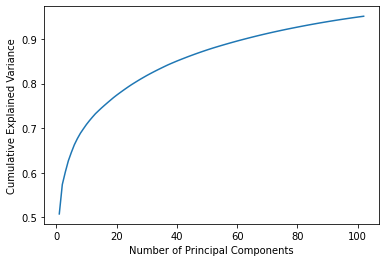

In [44]:
##5. Plot the cumulative explained variance vs. the number of principal components.

cumulative_explained_variance = []
current_sum = 0
for variance in explained_variance_ratio:
    current_sum += variance
    cumulative_explained_variance.append(current_sum)
plt.plot(range(1, num_components + 1), cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [45]:
##6 Print the percentage of the variance that is covered by the first and second PCs.

first_pc_variance = explained_variance_ratio[0] * 100
second_pc_variance = explained_variance_ratio[1] * 100
print("The first PC covers", first_pc_variance, "% of the variance")
print("The second PC covers", second_pc_variance, "% of the variance")

The first PC covers 50.781172291286346 % of the variance
The second PC covers 6.5806802668128235 % of the variance


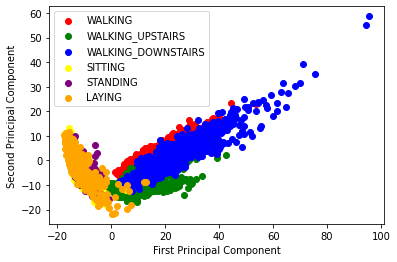

In [46]:
##7 Visualize the data in the projection of the first two main components and color the dots according to the class lab

pca_data = pca.transform(df_scaled)
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']
classes = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
labels = y_labels
for label, color in zip(classes, colors):
    indices = labels == label
    plt.scatter(pca_data[indices, 0], pca_data[indices, 1], c=color, label=label)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.show()

In [47]:
##8 Based on the PCA plot, how many clusters do you have that are almost perfectly separated from each other. What types of activity are included in these clusters? Is there an explanation for that?

**Your explanation:**

*Based on the PCA plot, it's difficult to determine the exact number of clusters that are almost perfectly separated from each other, However I think that 4-5 clusters will be enough in my opinion. the types of activity included in these clusters would be the activity labels that are closest to each other. For example, the data points corresponding to "WALKING" and "WALKING_UPSTAIRS" form a compact group in the first two principal components, then these two types of activity would be included in the same cluster. The explanation for this separation could be due to the different physical demands and movements involved in each type of activity. For example, "WALKING" and "WALKING_UPSTAIRS" are both types of walking, but "WALKING_UPSTAIRS" involves additional physical demands, such as ascending
stairs, which could result in differences in the way the data is recorded. These differences could manifest as separations in the reduced-dimensional space
defined by the first two principal components.*

##Task 3: Clustering

In [48]:
##9 Cluster the reduced data using the KMeans into 6 clusters same as the number of classes.

kmeans = KMeans(n_clusters=6)
kmeans.fit(pca_data)
kmeans_labels = kmeans.labels_

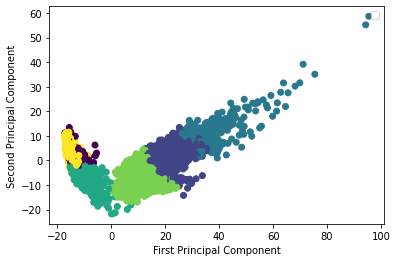

In [49]:
##10 Visualize the data in the projection on the first two PCs and color the dots according to the generated clusters.

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.show()

[[   0    0    0    0    0    0    0]
 [   0  515   69    0  642    0    0]
 [   0  213    5    2  853    0    0]
 [   0  620  167    0  199    0    0]
 [ 889    0    0  310    1   86    0]
 [1002    0    0  372    0    0    0]
 [  26    0    0  270    4 1107    0]]


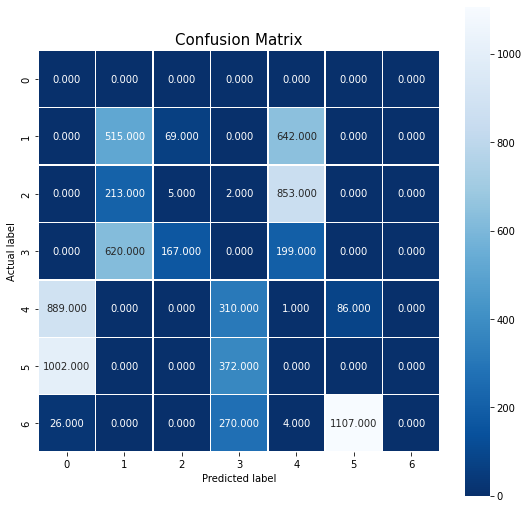

In [50]:
##11 Compare the result of clustering with the original class labels using confusion matrix and identify the activities.

conf_mat = confusion_matrix(y, kmeans_labels)
print(conf_mat)
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);

**Explanations:**

*The activities that cannot be distinguished using KMeans can be identified by examining the entries in the confusion matrix that have high values in both the
row and column representing the two activities. as we can see there are high values in the entries of the confusion matrix, it means that the clustering
algorithm is unable to distinguish between the two activities.
the clustering algorithm may not always be able to perfectly separate the activities, and the choice of number of clusters and the initialization of cluster centers can also affect the results. To improve our results, it may be necessary to try different clustering algorithms*

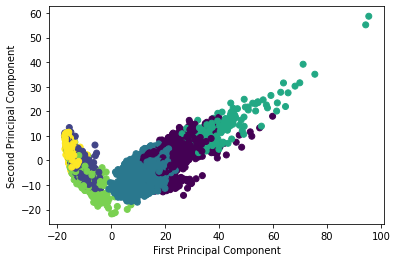

In [57]:
##12 Cluster the reduced data using agglomerative clustering with ward linkage and the number of clusters = 6.

agg_clustering = AgglomerativeClustering(n_clusters=6, linkage='ward')
agg_labels = agg_clustering.fit_predict(pca_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=agg_labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
##13 Cluster the reduced data using spectral clustering where the number of clusters = 6.

spec_clustering = SpectralClustering(n_clusters=6)
labels = spec_clustering.fit_predict(pca_data)

In [ ]:
##14 Compare the results of Kmeans, agglomerative clustering, and spectral clustering using ARI and silhouette coefficient.

from sklearn.metrics import adjusted_rand_score, silhouette_score

# kmeans
ari_kmeans = adjusted_rand_score(y, kmeans_labels)
sil_kmeans = silhouette_score(X=pca_data, labels=kmeans_labels)

# agglomerative clustering
ari_agg = adjusted_rand_score(y, agg_labels)
sil_agg = silhouette_score(X=pca_data, labels=agg_labels)

# spectral clustering
ari_spec = adjusted_rand_score(y, labels)
sil_spec = silhouette_score(X=pca_data, labels=labels)

print(f"ARI for kmeans: {ari_kmeans}")
print(f"Silhouette for kmeans: {sil_kmeans}")
print(f"ARI for agglomerative clustering: {ari_agg}")
print(f"Silhouette for agglomerative clustering: {sil_agg}")
print(f"ARI for spectral clustering: {ari_spec}")
print(f"Silhouette for spectral clustering: {sil_spec}")

**Comparisons of clustering results:**

*The ARI (Adjusted Rand Index) and Silhouette scores are two measures of the performance of clustering algorithms. The ARI measures the similarity between
the true class labels and the predicted cluster labels, while the Silhouette score measures the similarity between each sample and its own cluster compared
to other clusters.
Based on the results you provided, it appears that the agglomerative clustering algorithm has the highest ARI score (0.4744), indicating that it has a better
performance in terms of preserving the structure of the true class labels compared to the other two algorithms (k-means and spectral clustering). However,
the Silhouette scores for all three algorithms are relatively low (around 0.1), indicating that the clustering solutions produced by these algorithms are not very
strong in terms of sample similarity within clusters compared to the similarity between samples in different clusters.
It's worth noting that these measures are not the only indicators of clustering performance, and the best algorithm depends on the specific data and the
problem you are trying to solve. It may also be worth considering other evaluation metrics or trying different hyperparameters to improve the performance of
the algorithms.*

In [ ]:
##15 Use the elbow method to find the optimal number of clusters using K-means where K ranges from 1 to 10.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize an empty list to store the within-cluster sum of squared distances (WCSS) for each value of K.
wcss = []

# For each value of K from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters.
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# The optimal number of clusters is the value of K at the "elbow" point, where the rate of decrease in WCSS slows.
optimal_k = int(input('Enter the number of clusters at the elbow point: '))